<a href="https://colab.research.google.com/github/kgpark88/nlp/blob/main/02_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

# 선형회귀(Linear Regression)

선형 회귀는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.
- x: 독립변수(independent variable), 예) 몸무게
- y: 종속변수(dependent variable), 예) 키
- $y = \alpha x + b$

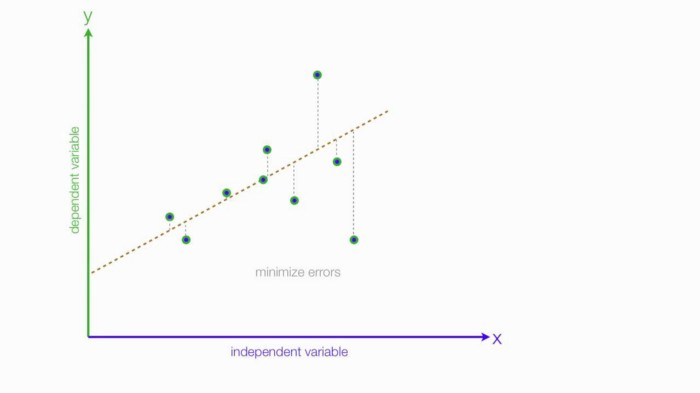

## 데이터셋

In [1]:
import numpy as np

In [2]:
# create dummy data for training
x_values = [i for i in range(11)]
print(x_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
print(x_train.shape)

(11,)


In [4]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
print(x_train.shape)

(11, 1)


In [5]:
y_values = [2*i + 1 for i in x_values]

In [6]:
print(y_values)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [7]:
y_train = np.array(y_values, dtype=np.float32)
print(y_train.shape)

(11,)


In [8]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
print(y_train.shape)

(11, 1)


## Regression 신경망 모델

In [9]:
import torch
from torch.autograd import Variable

In [10]:
class linearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [11]:
input_dim = 1
output_dim = 1
learning_rate = 0.01 
epochs = 100

model = linearRegression(input_dim, output_dim)
# For GPU
if torch.cuda.is_available():
    model.cuda()

## 손실 함수(MSE: Mean Squared Error)
$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{split}$<br>

- $y$: true value  
- $\hat y$: prediction  



In [12]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 모델 훈련(Train)

In [13]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(135.7494, grad_fn=<MseLossBackward>)
epoch 0, loss 135.74935913085938
tensor(11.4099, grad_fn=<MseLossBackward>)
epoch 1, loss 11.40990924835205
tensor(1.2642, grad_fn=<MseLossBackward>)
epoch 2, loss 1.2641648054122925
tensor(0.4329, grad_fn=<MseLossBackward>)
epoch 3, loss 0.4328865110874176
tensor(0.3614, grad_fn=<MseLossBackward>)
epoch 4, loss 0.36139872670173645
tensor(0.3519, grad_fn=<MseLossBackward>)
epoch 5, loss 0.35192617774009705
tensor(0.3476, grad_fn=<MseLossBackward>)
epoch 6, loss 0.3475528061389923
tensor(0.3436, grad_fn=<MseLossBackward>)
epoch 7, loss 0.3436354100704193
tensor(0.3398, grad_fn=<MseLossBackward>)
epoch 8, loss 0.33979547023773193
tensor(0.3360, grad_fn=<MseLossBackward>)
epoch 9, loss 0.3360006511211395
tensor(0.3322, grad_fn=<MseLossBackward>)
epoch 10, loss 0.33224859833717346
tensor(0.3285, grad_fn=<MseLossBackward>)
epoch 11, loss 0.3285386264324188
tensor(0.3249, grad_fn=<MseLossBackward>)
epoch 12, loss 0.32486972212791443
tensor(0.3212, 

## 모델 테스트

[[ 0.3494717]
 [ 2.4431539]
 [ 4.5368357]
 [ 6.6305175]
 [ 8.7242   ]
 [10.817883 ]
 [12.911564 ]
 [15.005246 ]
 [17.098928 ]
 [19.19261  ]
 [21.286293 ]]


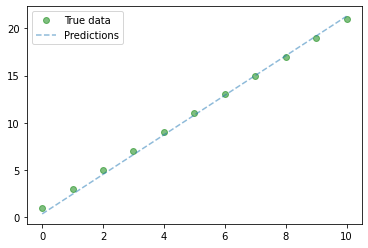

In [14]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

import matplotlib.pyplot as plt

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()